# Task - data preparation, basic statistical analysis

You will try to process a very similar dataset as in the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

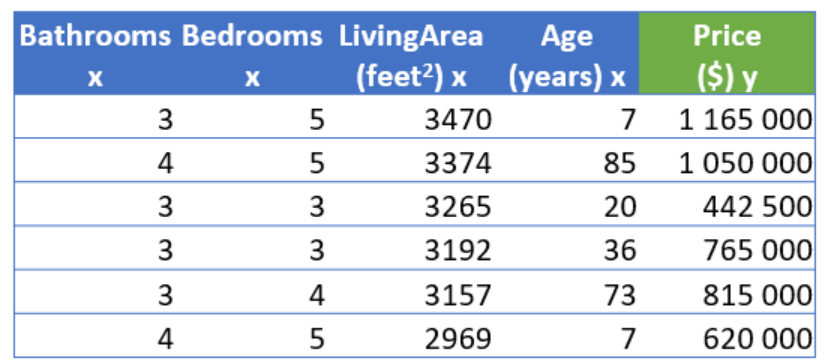

# Task

- Perform a statistical analysis of the data
- Visualize the data
- Select appropriate variables for the linear model
- Standardize the data

## Reading data from CSV file

In [8]:
,# CELL 1: Load Libraries, Read Data, and Define Columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Required libraries loaded successfully.")

# --- File Path Check ---
# Please adjust this path according to your file location!
FILE_PATH = "..\\dataset\\portland_filtered.csv"

try:
    data = pd.read_csv(FILE_PATH, sep=';')
    print(f"Data loaded successfully. Record count: {len(data)}")
except FileNotFoundError:
    print(f"ERROR: File '{FILE_PATH}' not found. Please verify the file path.")
    # Set data to None if loading fails to prevent subsequent errors
    data = None 

# --- Column Definitions ---
# IMPORTANT: These must be the correct, verified column names from your dataset.
# Based on the data preview, the corrected lowercase names should be used:
TARGET_COL = 'price'  # Verified correct name: 'price'
FEATURE_COLS = ['livingArea', 'bathrooms', 'bedrooms', 'age'] # Verified correct names

if data is not None:
    print(f"\nTarget Column (Y): {TARGET_COL}")
    print(f"Feature Columns (X): {FEATURE_COLS}")

Required libraries loaded successfully.
Data loaded successfully. Record count: 100

Target Column (Y): price
Feature Columns (X): ['livingArea', 'bathrooms', 'bedrooms', 'age']


In [4]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

## Basic data characteristics
- data preview
- display of basic statistics (average, minimum, maximum, ...)
- checking NaN values

In [20]:
print("## SECTION 1: Basic Data Characteristics and Statistics ##")

# 1. Data Preview
print("\n--- Data Preview (First 5 Rows) ---")
print(data.head()) 

# 2. Display of Basic Statistics (average, minimum, maximum, ...)
print("\n--- Basic Statistics (describe) ---")
print(data.describe().T) 

# 3. Checking NaN (Missing) values
print("\n--- Missing Value Check (NaN Count per Column) ---")
nan_counts = data.isnull().sum()
# Print only columns with missing values
print(nan_counts[nan_counts > 0]) 

# 4. Simple Data Cleaning: Dropping rows with NaN values (We need complete data for the model)
initial_len = len(data)
# Drop NaN values specifically in the columns we plan to use for the model
data_cleaned = data.dropna(subset=[TARGET_COL] + FEATURE_COLS)
cleaned_len = len(data_cleaned)

# Display cleaning results
print(f"\nData cleaned. Lost records: {initial_len - cleaned_len}")
print(f"Cleaned record count: {cleaned_len}")

## SECTION 1: Basic Data Characteristics and Statistics ##

--- Data Preview (First 5 Rows) ---
   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000

--- Basic Statistics (describe) ---
            count       mean            std       min       25%       50%  \
bathrooms   100.0       2.38       0.838228       1.0       2.0       2.0   
bedrooms    100.0       3.26       0.860115       1.0       3.0       3.0   
livingArea  100.0    1974.08     663.629851     766.0    1530.0    1859.0   
age         100.0      49.88      32.779730       3.0      20.0      47.5   
price       100.0  519607.36  172224.092241  165000.0  412500.0  500000.0   

                  75%        max  
bathrooms        3.00        5.0  
bedrooms         4.00        6.0  
livin

## Data distribution
- charts with data distribution
- boxplot charts
- describe what the data is (skewed values, ...)

## SECTION 2: Data Distribution (Histogram and Boxplot) ##
Analysis Note: Examining skewness (skewed values) and outliers.


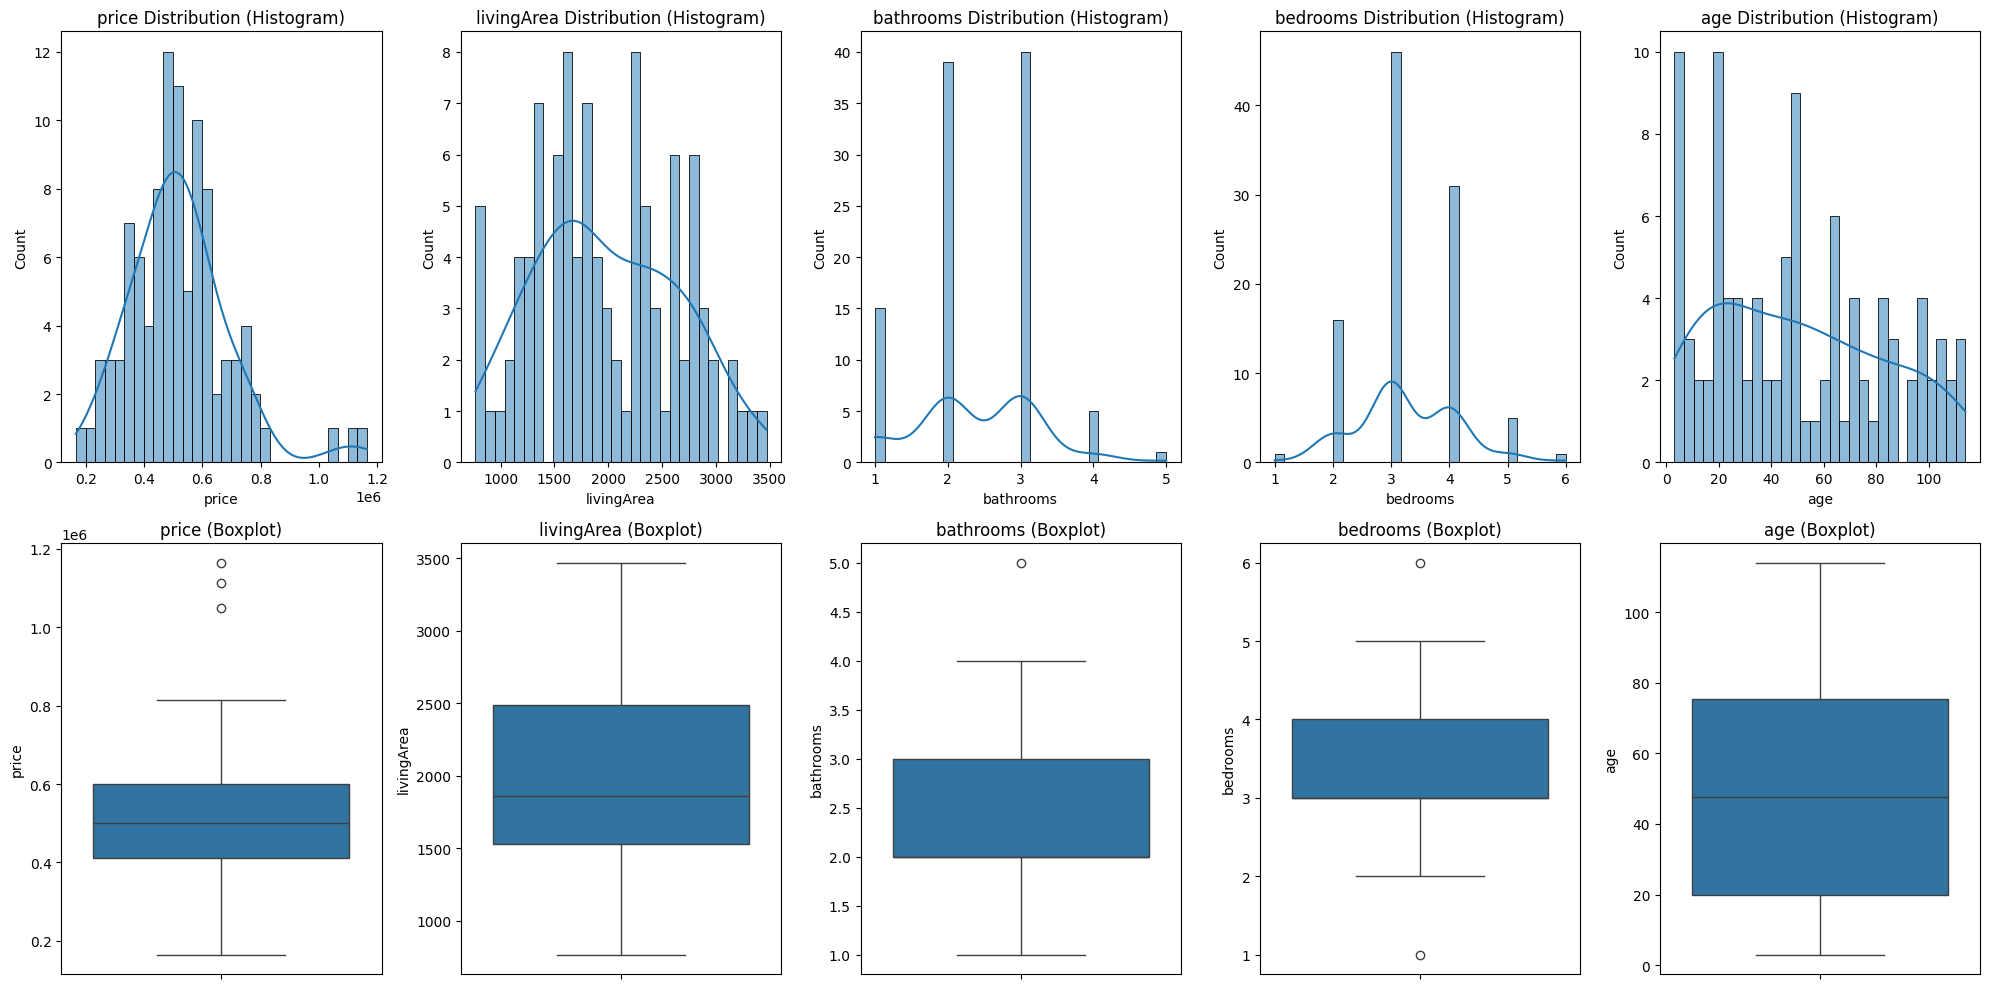

In [19]:
print("## SECTION 2: Data Distribution (Histogram and Boxplot) ##")
print("Analysis Note: Examining skewness (skewed values) and outliers.") 

plot_cols = [TARGET_COL] + FEATURE_COLS
# Charts with data distribution, boxplot charts
plt.figure(figsize=(20, 10))

for i, col in enumerate(plot_cols):
    # Histogram (Distribution shape and skewness)
    plt.subplot(2, len(plot_cols), i + 1)
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f'{col} Distribution (Histogram)')
    
    # Boxplot (Outliers)
    plt.subplot(2, len(plot_cols), i + 1 + len(plot_cols))
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'{col} (Boxplot)')

plt.tight_layout()
plt.show()

## Relationships between data
- pairplot
- correlation table
- Determine which columns are linearly dependent, suitable for explaining price

## SECTION 3: Relationships Between Data ##

--- Correlation Table ---
               price  livingArea  bathrooms  bedrooms       age
price       1.000000    0.759973   0.463856  0.498934  0.114328
livingArea  0.759973    1.000000   0.566558  0.641684  0.019381
bathrooms   0.463856    0.566558   1.000000  0.618132 -0.536517
bedrooms    0.498934    0.641684   0.618132  1.000000 -0.224947
age         0.114328    0.019381  -0.536517 -0.224947  1.000000


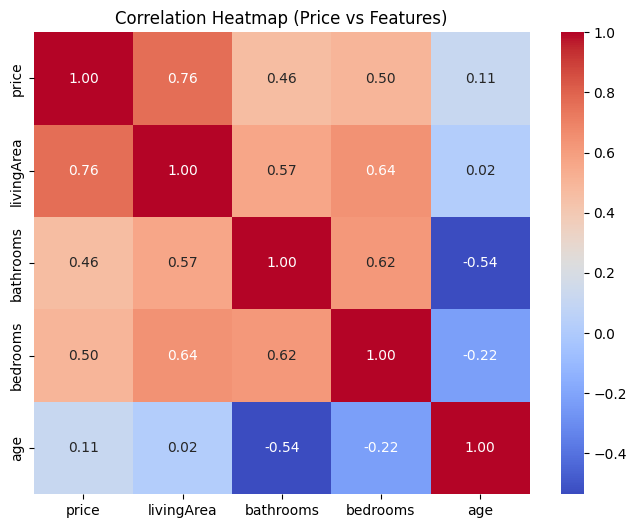


--- Variable Selection for Linear Regression ---
Columns Linearly Dependent on Price and Suitable for Modeling: ['livingArea']


In [18]:
print("## SECTION 3: Relationships Between Data ##")

plot_cols = [TARGET_COL] + FEATURE_COLS

correlation_matrix = data_cleaned[plot_cols].corr()

print("\n--- Correlation Table ---")
print(correlation_matrix) # correlation table

# Heatmap (Visualization of correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Price vs Features)')
plt.show()

# --- Determine which columns are linearly dependent, suitable for explaining price ---
print("\n--- Variable Selection for Linear Regression ---")
price_correlations = correlation_matrix[TARGET_COL].sort_values(ascending=False)

# List columns with the strongest linear relationship to Price 
# (Generally, absolute correlation value |r| >= 0.5 is considered strong).
suitable_cols = price_correlations[abs(price_correlations) >= 0.5].index.tolist()

# Remove the target column (Price) from the list of features.
if TARGET_COL in suitable_cols:
    suitable_cols.remove(TARGET_COL)

print(f"Columns Linearly Dependent on Price and Suitable for Modeling: {suitable_cols}")

## Data standardization

Each function has a different mean, standard deviation.

Standardization center and scale function.

Reasons:
* to prevent some functions from dominating the model.
* can help machine learning models converge faster
* can facilitate interpretation of machine learning model coefficients

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum of (x) / number of (x)
* standard_deviation = sqrt( sum ( (x - mean)^2 ) / count (x))

- perform the standardization of the columns used for the linear regression
- show the distribution of the original and standardised data
*** Translated with www.DeepL.com/Translator (free version) ***



## SECTION 4: Data Standardization ##

Standardized Data Summary (Mean should be ~0 and Std Dev should be ~1):
            count          mean       std       min       25%       50%  \
livingArea  100.0  1.398881e-16  1.005038 -1.829583 -0.672539 -0.174284   
bathrooms   100.0  9.769963e-17  1.005038 -1.654624 -0.455621 -0.455621   
bedrooms    100.0  2.842171e-16  1.005038 -2.640792 -0.303808 -0.303808   
age         100.0 -8.215650e-17  1.005038 -1.437357 -0.916131 -0.072972   

                 75%       max  
livingArea  0.781716  2.265504  
bathrooms   0.743382  3.141387  
bedrooms    0.864684  3.201669  
age         0.777853  1.965941  


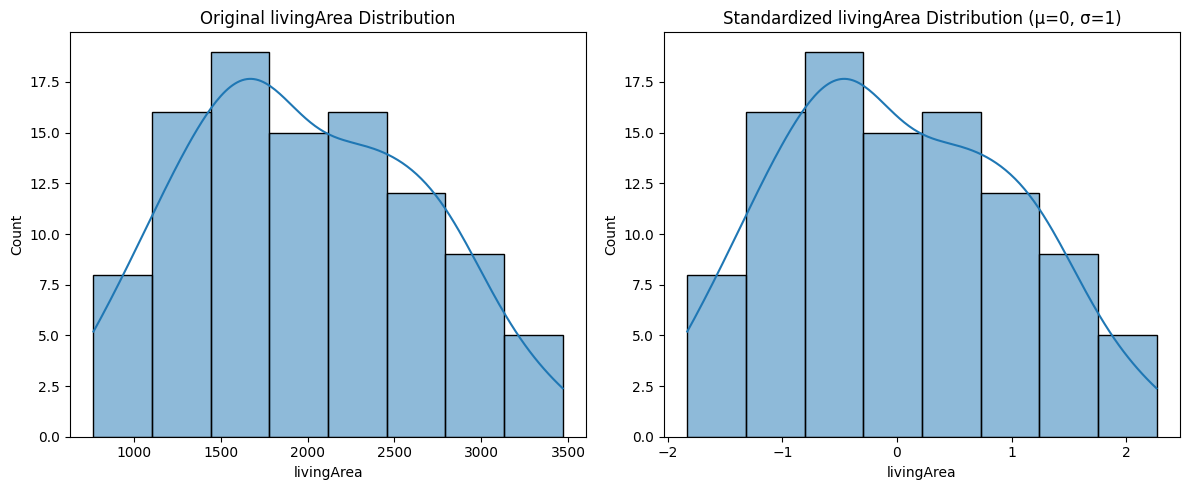


Analysis Note on Standardization:
Standardization is performed for the following reasons:
* To prevent features with larger magnitudes (like 'livingArea') from *dominating the model*.
* It can help machine learning models *converge faster* during training.
* It facilitates *interpretation of model coefficients* (as a 1-unit change represents 1 standard deviation).
The process shifts the data's mean to 0 and scales the spread to a standard deviation of 1, but *does not* alter the shape (skewness) of the original distribution.


In [16]:
print("## SECTION 4: Data Standardization ##")

# Retrieve the independent variables (X) and the target variable (Y)
X = data_cleaned[FEATURE_COLS]
Y = data_cleaned[TARGET_COL]

# Standardization operation using StandardScaler (calculates mean/std dev and applies the transformation)
# Calculation: x_new = (x - mean) / standard_deviation
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
# (index=X.index ensures the preservation of the original row mapping)
X_scaled = pd.DataFrame(X_scaled_array, columns=FEATURE_COLS, index=X.index)

print("\nStandardized Data Summary (Mean should be ~0 and Std Dev should be ~1):")
# Verify successful standardization
print(X_scaled.describe().T)


# --- Show the distribution of the original and standardised data ---
feature_to_show = FEATURE_COLS[0] # Using the first feature, e.g., 'livingArea'

plt.figure(figsize=(12, 5))

# 1. Original Data Distribution
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned[feature_to_show], kde=True)
plt.title(f'Original {feature_to_show} Distribution')

# 2. Standardized Data Distribution
plt.subplot(1, 2, 2)
sns.histplot(X_scaled[feature_to_show], kde=True)
plt.title(f'Standardized {feature_to_show} Distribution (μ=0, σ=1)')

plt.tight_layout()
plt.show()

# Analysis Note summarizing the reasons and effect of standardization
print("\nAnalysis Note on Standardization:")
print("Standardization is performed for the following reasons:")
print("* To prevent features with larger magnitudes (like 'livingArea') from *dominating the model*.")
print("* It can help machine learning models *converge faster* during training.")
print("* It facilitates *interpretation of model coefficients* (as a 1-unit change represents 1 standard deviation).")
print("The process shifts the data's mean to 0 and scales the spread to a standard deviation of 1, but *does not* alter the shape (skewness) of the original distribution.")